In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import cartopy.feature as feature

In [2]:
path  = '/groups/ESS/share/projects/SWUS3km/data/cmaqdata/CCTMout/12km/POST/'
files = 'COMBINE3D_ACONC_v531_gcc_AQF5X_202208*.nc'

In [3]:
ds = xr.open_mfdataset(path+files,concat_dim='time',combine='nested')
ds

,Array,Chunk
Bytes,197.62 kiB,6.38 kiB
Shape,"(31, 24, 34, 2)","(1, 24, 34, 2)"
Count,124 Tasks,31 Chunks
Type,int32,numpy.ndarray
,Array,Chunk
Bytes,11.36 GiB,375.33 MiB
Shape,"(31, 24, 35, 265, 442)","(1, 24, 35, 265, 442)"
Count,124 Tasks,31 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [4]:
latlon = xr.open_dataset('/groups/ESS2/projects/30YR/data/mcip/2020/GRIDCRO2D_20200801.nc')
latlon

<xarray.Dataset>
Dimensions:  (TSTEP: 1, VAR: 7, DATE-TIME: 2, LAY: 1, ROW: 265, COL: 442)
Dimensions without coordinates: TSTEP, VAR, DATE-TIME, LAY, ROW, COL
Data variables:
    TFLAG    (TSTEP, VAR, DATE-TIME) int32 ...
    LAT      (TSTEP, LAY, ROW, COL) float32 ...
    LON      (TSTEP, LAY, ROW, COL) float32 ...
    MSFX2    (TSTEP, LAY, ROW, COL) float32 ...
    HT       (TSTEP, LAY, ROW, COL) float32 ...
    DLUSE    (TSTEP, LAY, ROW, COL) float32 ...
    LWMASK   (TSTEP, LAY, ROW, COL) float32 ...
    PURB     (TSTEP, LAY, ROW, COL) float32 ...
Attributes: (12/33)
    IOAPI_VERSION:  ioapi-3.2: $Id: init3.F90 185 2020-08-28 16:49:45Z coats ...
    EXEC_ID:        mcip                                                     ...
    FTYPE:          1
    CDATE:          2022125
    CTIME:          174028
    WDATE:          2022125
    ...             ...
    VGLVLS:         [1.     0.9941]
    GDNAM:          AQF5X_CROSS     
    UPNAM:          OUTGM3IO        
    VAR-LIST:       LAT             LON             MSFX2           HT       ...
    FILEDESC:       US EPA COMMUNITY MULTISCALE AIR QUALITY MODEL            ...
    HISTORY:

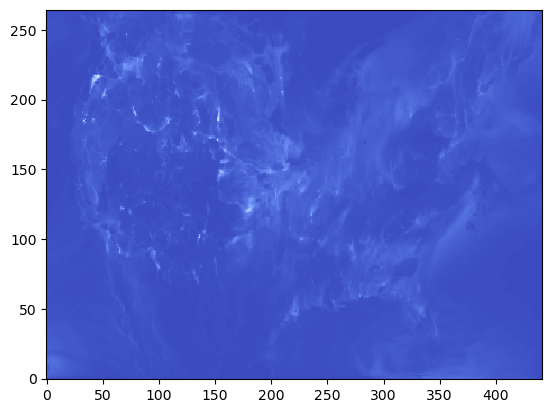

In [5]:
plt.pcolormesh(ds.COL,ds.ROW,ds['PM10'][0,0,0,:,:],cmap='coolwarm')

In [6]:
ds_climo = ds.groupby('TSTEP').mean('time')
ds_climo

<xarray.Dataset>
Dimensions:       (TSTEP: 24, VAR: 34, DATE-TIME: 2, LAY: 35, ROW: 265, COL: 442)
Dimensions without coordinates: TSTEP, VAR, DATE-TIME, LAY, ROW, COL
Data variables: (12/35)
    TFLAG         (TSTEP, VAR, DATE-TIME) float64 dask.array<chunksize=(1, 34, 2), meta=np.ndarray>
    CO            (TSTEP, LAY, ROW, COL) float32 dask.array<chunksize=(1, 35, 265, 442), meta=np.ndarray>
    FORM          (TSTEP, LAY, ROW, COL) float32 dask.array<chunksize=(1, 35, 265, 442), meta=np.ndarray>
    HNO3          (TSTEP, LAY, ROW, COL) float32 dask.array<chunksize=(1, 35, 265, 442), meta=np.ndarray>
    OH            (TSTEP, LAY, ROW, COL) float32 dask.array<chunksize=(1, 35, 265, 442), meta=np.ndarray>
    ISOP          (TSTEP, LAY, ROW, COL) float32 dask.array<chunksize=(1, 35, 265, 442), meta=np.ndarray>
    ...            ...
    PMC_CL        (TSTEP, LAY, ROW, COL) float32 dask.array<chunksize=(1, 35, 265, 442), meta=np.ndarray>
    PMC_NA        (TSTEP, LAY, ROW, COL) float32 dask.array<chunksize=(1, 35, 265, 442), meta=np.ndarray>
    PMC_NH4       (TSTEP, LAY, ROW, COL) float32 dask.array<chunksize=(1, 35, 265, 442), meta=np.ndarray>
    PMC_NO3       (TSTEP, LAY, ROW, COL) float32 dask.array<chunksize=(1, 35, 265, 442), meta=np.ndarray>
    PMC_SO4       (TSTEP, LAY, ROW, COL) float32 dask.array<chunksize=(1, 35, 265, 442), meta=np.ndarray>
    PMC_TOT       (TSTEP, LAY, ROW, COL) float32 dask.array<chunksize=(1, 35, 265, 442), meta=np.ndarray>

Text(0.5, 0.98, '')

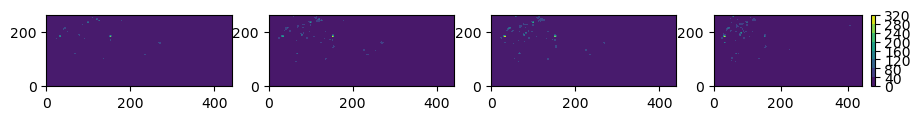

In [9]:
fig = plt.figure(figsize=(11,6.5))
plt.subplot(6,4,1)

plt.contourf((ds_climo['PM10'].sel(TSTEP=0,LAY = 0)+ds_climo['PM10'].sel(TSTEP=1,LAY = 0))/2)
plt.subplot(6,4,2)
plt.contourf(ds_climo['PM10'].sel(TSTEP=1,LAY = 0))
plt.subplot(6,4,3)
plt.contourf(ds_climo['PM10'].sel(TSTEP=2,LAY = 0))
plt.subplot(6,4,4)
plt.contourf(ds_climo['PM10'].sel(TSTEP=3,LAY = 0))

plt.colorbar()
plt.suptitle('') #supertitle

ValueError: num must be 1 <= num <= 12, not 13

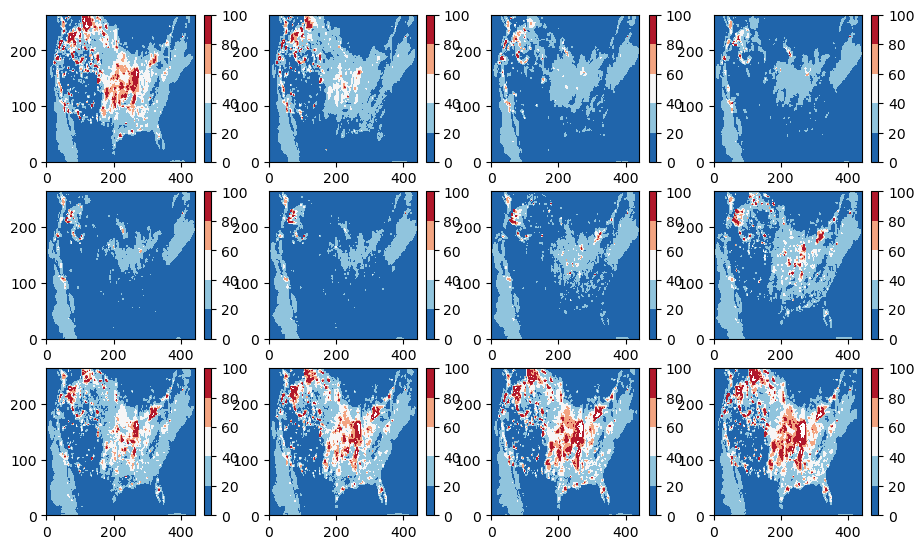

In [10]:
fig = plt.figure(figsize=(11,6.5))
clevs=np.arange(0,120,20)
for i,seas in enumerate(ds_climo['TSTEP']/2):
    plt.subplot(3,4,i+1)
    plt.contourf((ds_climo['PM10'].sel(TSTEP=2*i+0,LAY = 0)+ds_climo['PM10'].sel(TSTEP=2*i+1,LAY = 0)),
                 levels=clevs,
                 cmap='RdBu_r',
                )

    plt.colorbar()
plt.suptitle('PM10 (ug m-3)') #supertitle